# Deep Learning Final Project

Submitted by: Albert Khayat - 212747026, David Afik - 318267721

# Setup

### Imports

In [1]:
import torch

from model.MainModel import Painter
from data import ImagesDataset


### Configurations

In [2]:
print(f"CUDA version: {torch.version.cuda}")

if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Name of current CUDA device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    device = torch.device('cpu')
    print('Running on CPU')

CUDA version: 12.1
Name of current CUDA device: NVIDIA GeForce RTX 3060 Laptop GPU


### Load Data

In [3]:
DATA_PATH = "data\\food"

TRAIN_SIZE = 10000
TEST_SIZE = 1500

BATCH_SIZE_TRAIN = 20
BATCH_SIZE_TEST = 20

SPLIT_SEED = 1234

# Get dataset
train_data, test_data = ImagesDataset.create_datasets(DATA_PATH, TRAIN_SIZE, TEST_SIZE, SPLIT_SEED, device)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE_TRAIN, shuffle=True, pin_memory=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE_TEST, shuffle=True, pin_memory=False)

# Train Model

In [4]:
# Training parameters
MODEL_NAME = "final"		# Used for save path
PRE_TRAIN = True		# if True, pre-trains generator
LOAD = False			# if True, loads model with model_name before train
LOAD_PRETRAIN = False	# if True, loads pre-train data
SAVE_MODEL = True		# if True, saves model every epoch

NUM_EPOCHS = 0
PRE_EPOCHS = 5

In [5]:
# Create model
model = Painter(MODEL_NAME, load=LOAD, load_pretrain=LOAD_PRETRAIN, device=device).to(device)

n_params_g, n_params_d = model.count_parameters()
print(f"Number of generator parameters: {n_params_g:,}")
print(f"Number of discriminator parameters: {n_params_d:,}")
print(f"Number of parameters: {(n_params_d + n_params_g):,}")

Number of generator parameters: 9,155,618
Number of discriminator parameters: 3,921,664
Number of parameters: 13,077,282


Epoch 1/5


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/75 [00:00<?, ?it/s]

Generator test loss: 0.097339


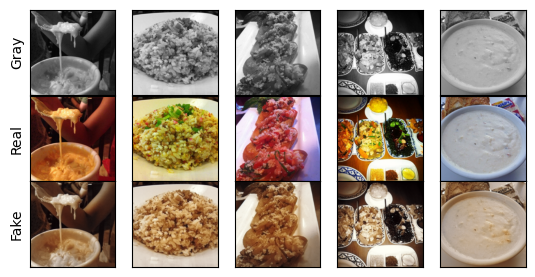

Epoch 2/5


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/75 [00:00<?, ?it/s]

Generator test loss: 0.097588


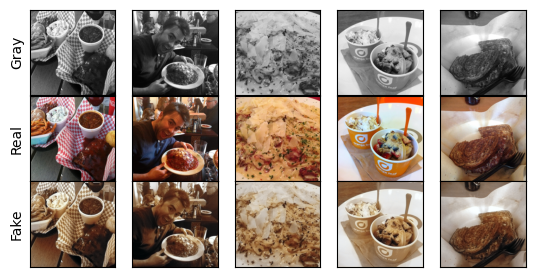

Epoch 3/5


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/75 [00:00<?, ?it/s]

Generator test loss: 0.096099


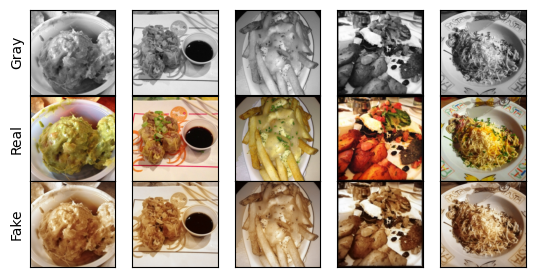

Epoch 4/5


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/75 [00:00<?, ?it/s]

Generator test loss: 0.094981


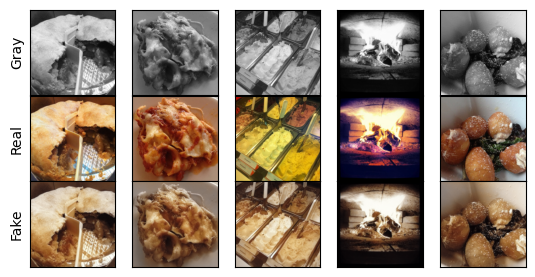

Epoch 5/5


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/75 [00:00<?, ?it/s]

Generator test loss: 0.095982


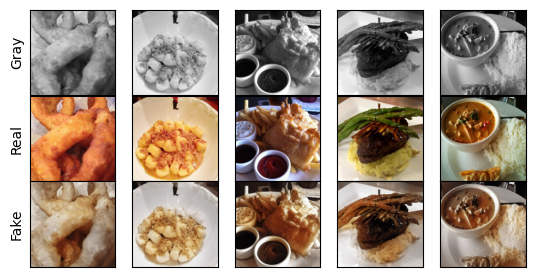

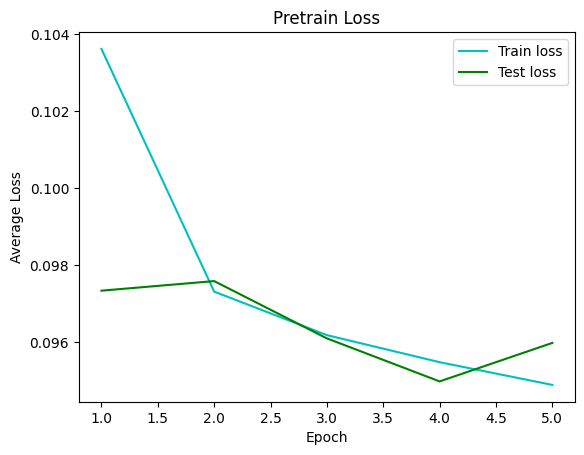

In [6]:
if PRE_TRAIN:
	# Pre-train generator
	for e in range(PRE_EPOCHS):
		print(f"Epoch {model.logger.epochs_pretrained+1}/{PRE_EPOCHS + model.logger.epochs_pretrained - e}")

		train_loss = model.pretrain_generator(train_loader)
		test_loss = model.test_model(test_loader, pretrain=True)
		
		print(f"Generator test loss: {test_loss:.6f}")
		model.logger.plot_coloring()

		model.logger.after_pretrain(train_loss, test_loss)

		if SAVE_MODEL: model.save(pretrain=True)

	model.logger.plot_performence(pretrain=True)

In [ ]:
# Train model
for e in range(NUM_EPOCHS):
	print(f"Training epoch {model.logger.epochs_trained+1}/{NUM_EPOCHS + model.logger.epochs_trained - e}")

	model.train_model(train_loader)
	model.test_model(test_loader, log=True)

	# Show loss and coloring after epoch
	model.logger.print_epoch()
	model.logger.plot_coloring()

	if SAVE_MODEL: model.save()

model.logger.plot_performence()

# Test Model

In [ ]:
# If set to None, tests model from the prevous code blocks
model_name = None

if model_name is not None: model = Painter(model_name, load=True, device=device)

In [ ]:
loss_fake, loss_real, gan_loss, l1_loss = model.test_model(test_loader)
model.logger.plot_coloring()